# Comparing MRP and GSMF parameters across cosmic time

One of the motivating features of the MRP is that it is specified in a very similar way to important functions such as the Galaxy Stellar Mass Function (GSMF) and Luminosity Function (LF). Typically these observational functions are specified as either Schechter or double-Schechter functions (along with other non-parametric descriptions). Since MRP is a simple generalisation of the Schechter function, we can often directly compare parameters of the distributions.

To do this, we are going to use the published list of observational constraints on the Stellar Mass Function from Behroozi et al 2013, table 3 (some are not useful here, and we don't go to extremely high redshift):

[Baldry 2008](http://mnras.oxfordjournals.org/content/388/3/945.full.pdf): $z=0.003-0.05$, $M_\star = 10.648 M_\odot$, $\alpha_1 = -0.46/4.26$, $\alpha_2 = -1.58/0.58$

[Baldry 2012](http://mnras.oxfordjournals.org/content/421/1/621.full.pdf) <img src="gsmf/baldry2012.png"/>

[Perez-Gonzalez 2008](http://iopscience.iop.org/article/10.1086/523690/pdf): <img src="gsmf/gonzalez.png"/>

[Mortlock 2011](http://mnras.oxfordjournals.org/content/413/4/2845.full.pdf)  <img src="gsmf/mortlock.png"/>

[Marchesini 2009](http://iopscience.iop.org/article/10.1088/0004-637X/701/2/1765/pdf) <img src="gsmf/marchesini2009.png"/>

[Marchesini 2010](http://iopscience.iop.org/article/10.1088/0004-637X/725/1/1277/pdf) <img src="gsmf/marchesini2019.png"/>

[Lee 2012](http://iopscience.iop.org/article/10.1088/0004-637X/752/1/66/pdf) <img src="gsmf/lee.png"/>

We make a dictionary of all values, with uncertainties if possible:

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [15]:
GSMF = {"baldry08":{(0.003,0.05):{"mstar":10.648,'dmstar':0.013,"alpha2":-0.46,"alpha1":-1.58,'dalpha1':0.02,'dalpha2':0.05}},
        "baldry12":{(0.003,0.06):{"mstar":10.66,"alpha2":-0.35,"alpha1":-1.47,"dmstar":0.05,'dalpha1':0.05,"dalpha2":0.18}},
        "gonzalez08":{(0,0.2):{"mstar":11.16,"dmstar":0.25,"alpha1":-1.18,"dalpha1":0.12},
                     (0.2,0.4):{"mstar":11.2,"dmstar":0.1,"alpha1":-1.19,"dalpha1":0.08},
                     (0.4,0.6):{"mstar":11.26,"dmstar":0.11,"alpha1":-1.22,"dalpha1":0.07},
                     (0.6,0.8):{"mstar":11.25,"dmstar":0.08,"alpha1":-1.26,"dalpha1":0.08},
                     (0.8,1.0):{"mstar":11.27,"dmstar":0.09,"alpha1":-1.23,"dalpha1":0.09},
                     (1.0,1.3):{"mstar":11.31,"dmstar":0.11,"alpha1":-1.26,"dalpha1":0.04},
                     (1.3,1.6):{"mstar":11.34,"dmstar":0.1,"alpha1":-1.29,"dalpha1":0.08},
                     (1.6,2.0):{"mstar":11.40,"dmstar":0.18,"alpha1":-1.27,"dalpha1":0.11},
                     (2.0,2.5):{"mstar":11.46,"dmstar":0.15,"alpha1":-1.26,"dalpha1":0.08},
                     (2.5,3.0):{"mstar":11.34,"dmstar":0.39,"alpha1":-1.2,"dalpha1":0.27},
                     (3,3.5):{"mstar":11.33,"dmstar":0.31,"alpha1":-1.14,"dalpha1":0.21},
                     (3.5,4.0):{"mstar":11.36,"dmstar":0.17,"alpha1":-1.23,"dalpha1":0.05}},
        "mortlock11":{(1,1.5):{"mstar":11.43,"dmstar":None,"alpha1":-1.36,"dalpha1":0.05},
                      (1.5,2.0):{"mstar":11.43,"dmstar":None,"alpha1":-1.19,"dalpha1":0.06},
                      (2,2.5):{"mstar":11.43,"dmstar":None,"alpha1":-1.50,"dalpha1":0.08},
                      (2.5,3):{"mstar":11.43,"dmstar":None,"alpha1":-1.89,"dalpha1":0.11},
                      (3,3.5):{"mstar":11.43,"dmstar":None,"alpha1":-1.73,"dalpha1":0.09}},
        "marchesini09":{(0.05,0.12):{"mstar":10.96,"dmstar":0.01,"alpha1":-1.18,"dalpha1":0.03},
                        (1.3,2.0):{"mstar":10.91,"dmstar":0.41,"alpha1":-0.99,"dalpha1":0.31},
                        (2.0,3.0):{"mstar":10.96,"dmstar":0.33,"alpha1":-1.01,"dalpha1":0.35},
                        (3,4):{"mstar":11.38,"dmstar":0.46,"alpha1":-1.39,"dalpha1":0.63}},
       "lee12":{(3.5,4.5):{"mstar":10.35,"dmstar":0.35,"alpha1":-1.40,"dalpha1":0.28},
                (4.5,5.5):{"mstar":10.45,"dmstar":1.05,"alpha1":-1.36,"dalpha1":0.76}}}

In [13]:
np.array((1,2))

array([1, 2])

In [22]:
from mrpy.physical_dependence import mrp_params_b13

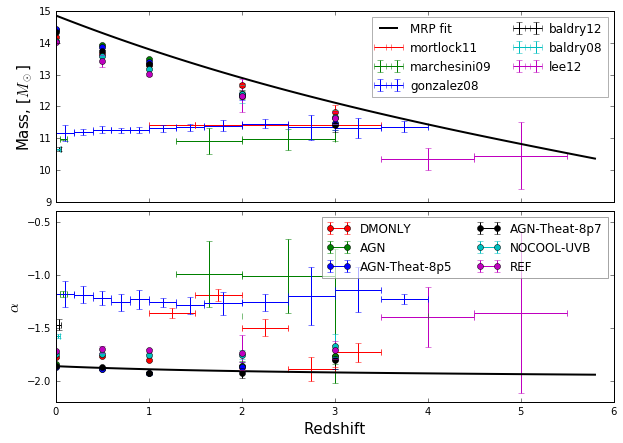

In [46]:
fig, ax = plt.subplots(2,1,sharex=True, gridspec_kw={"hspace":0.05},figsize=(10,7))

for i,(author,data) in enumerate(GSMF.iteritems()):
    color = 'rgbkcm'[i]
    
    for j,(zbin,vals) in enumerate(data.iteritems()):
        label = author if not j else None
        ax[0].errorbar((zbin[0]+zbin[1])/2, vals['mstar'], yerr=vals['dmstar'], xerr= np.atleast_2d(np.array(zbin) ) - (zbin[0]+zbin[1])/2, 
                       color=color, label=label)
        ax[1].errorbar((zbin[0]+zbin[1])/2, vals['alpha1'], yerr=vals['dalpha1'], xerr= np.atleast_2d(np.array(zbin) ) - (zbin[0]+zbin[1])/2, 
                       color=color)
        
        
z = np.linspace(0,5.8,100)
params = mrp_params_b13(z=z)

ax[0].plot(z,params[0] - np.log(0.67),color='k',label="MRP fit",lw=2)
ax[1].plot(z,params[1],color='k',lw=2)

### ADD OWLS
models = ["DMONLY", "AGN" , "AGN_Theat_8p5", "AGN_Theat_8p7", "NOCOOL_UVB", "REF"]
cosmos = ["WMAP7", "Planck"]
snaps = ["18", "22", '26', '28', '32']
zs = [3, 2, 1, 0.5, 0]
data = np.genfromtxt("/home/steven/Documents/Projects/MRP/MRP/OWLS-M200m-s1/all_MRP_params.txt").reshape(len(models),len(cosmos),len(snaps),7)
means = data[:,:,:, 1:4]
stds = data[:,:,:, 4:7]
c = "Planck"
for k, m in enumerate(models):
    for l, z in enumerate(zs):
        color = 'rgbkcm'[k]
        if l == 0:
            label = m.replace("_", "-")
        else:
            label = None
            
        ax[0].errorbar(z, means[k,1,l, 0], yerr=stds[k,1,l, 0], color=color, marker="o")
        ax[1].errorbar(z, means[k,1,l, 1], yerr=stds[k,1,l, 1], color=color, label=label, marker="o")
        
ax[0].legend(loc=0,ncol=2,framealpha=0.3)

legend = ax[1].legend(loc=0,ncol=2,framealpha=0.3)
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_edgecolor("grey")
frame.set_alpha(0.7)

ax[0].set_ylabel(r"Mass, [$M_\odot$]",fontsize=15)
ax[1].set_ylabel(r"$\alpha$",fontsize=15)
ax[1].set_xlabel("Redshift",fontsize=15)

plt.savefig("../../../DIvingIntoTheDark_2016/Presentation/figures/mrp_vs_gsmf.pdf")